In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('D:\data sets\LoanData.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [5]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

## Data Exploration

In [6]:
df['Loan_ID'].nunique() #each record has unique value for loan_id. so drop this column

614

In [7]:
df.drop(columns=['Loan_ID'],inplace=True)

In [8]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

- Gender has missing values

In [9]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [10]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

- Married has missing values

In [11]:
df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [12]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

- Dependents has missing values, wrong data and wrong datatype

In [13]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [14]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [15]:
df['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [16]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [17]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [18]:
df['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [19]:
 df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [20]:
df['CoapplicantIncome'].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [21]:
df['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [22]:
# as loan is given based on the total income of the household, we create a new column which has total income of applicant income and coapplicant income
df['Income']=df['ApplicantIncome']+df['CoapplicantIncome'] 

In [23]:
df.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

In [24]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360.0,1.0,Rural,Y,2900.0
610,Male,Yes,3+,Graduate,No,40.0,180.0,1.0,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,Y,7583.0


In [25]:
df['Income'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Income, dtype: float64

In [26]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [27]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [28]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [29]:
df['Credit_History']=df['Credit_History'].replace({1:'good',0:'bad'})

In [30]:
df['Credit_History'].unique()

array(['good', 'bad', nan], dtype=object)

In [31]:
df['Credit_History'].value_counts()

Credit_History
good    475
bad      89
Name: count, dtype: int64

In [32]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [33]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [34]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [35]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [36]:
continous=['Income','LoanAmount']
discrete_categorical=['Gender','Married','Education','Self_Employed',
                      'Credit_History','Property_Area','Loan_Status']
discrete_count=['Dependents','Loan_Amount_Term']

# EDA
**for continous variables**

In [37]:
df[continous].describe()

,Income,LoanAmount
count,614.000000,592.000000
mean,7024.705081,146.412162
std,6458.663872,85.587325
min,1442.000000,9.000000
25%,4166.000000,100.000000
50%,5416.500000,128.000000
75%,7521.750000,168.000000
max,81000.000000,700.000000


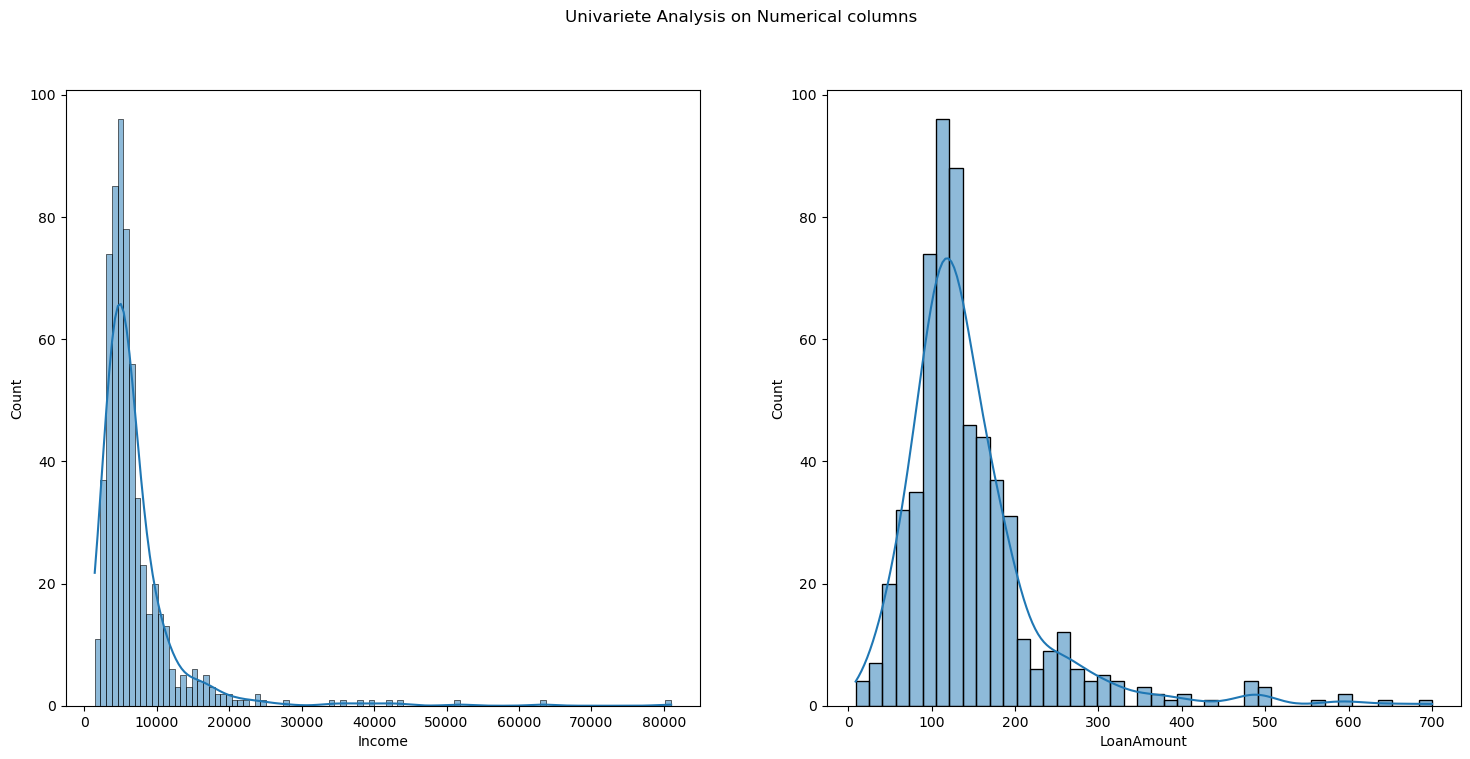

In [38]:
plt.rcParams['figure.figsize']=(18,8)

plt.subplot(1,2,1)
sns.histplot(df['Income'],kde=True)

plt.subplot(1,2,2)
sns.histplot(df['LoanAmount'],kde=True)

plt.suptitle('Univariete Analysis on Numerical columns')
plt.show()

In [39]:
df[continous].skew() # Income is heavily right skewed and loan amount is right skewed

Income        5.633449
LoanAmount    2.677552
dtype: float64

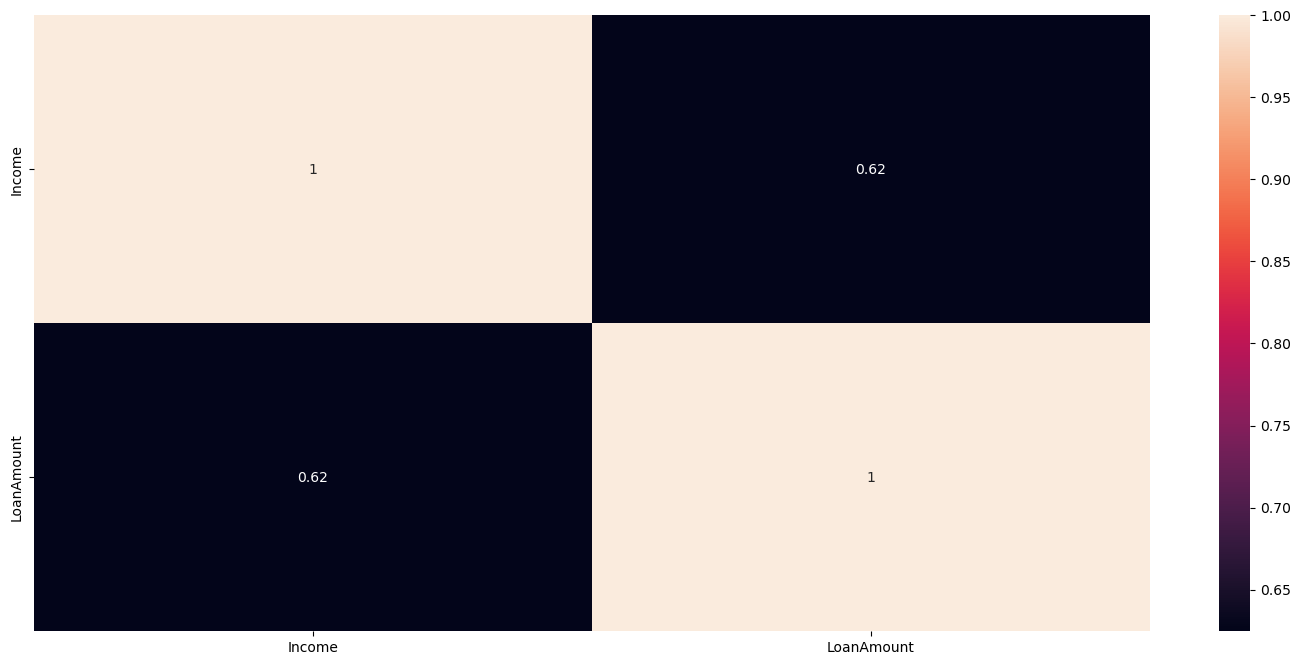

In [40]:
sns.heatmap(df[continous].corr(),annot=True)
plt.show()

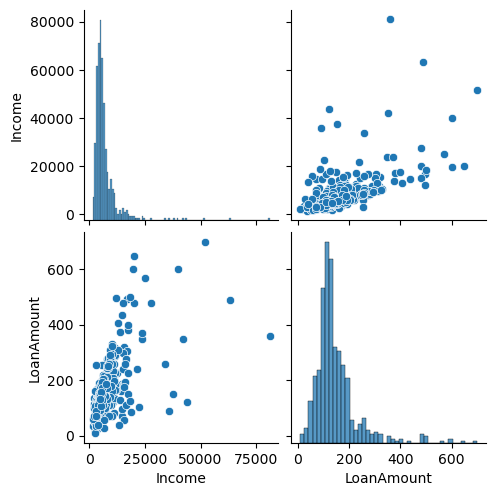

In [41]:
sns.pairplot(df[continous])
plt.show()

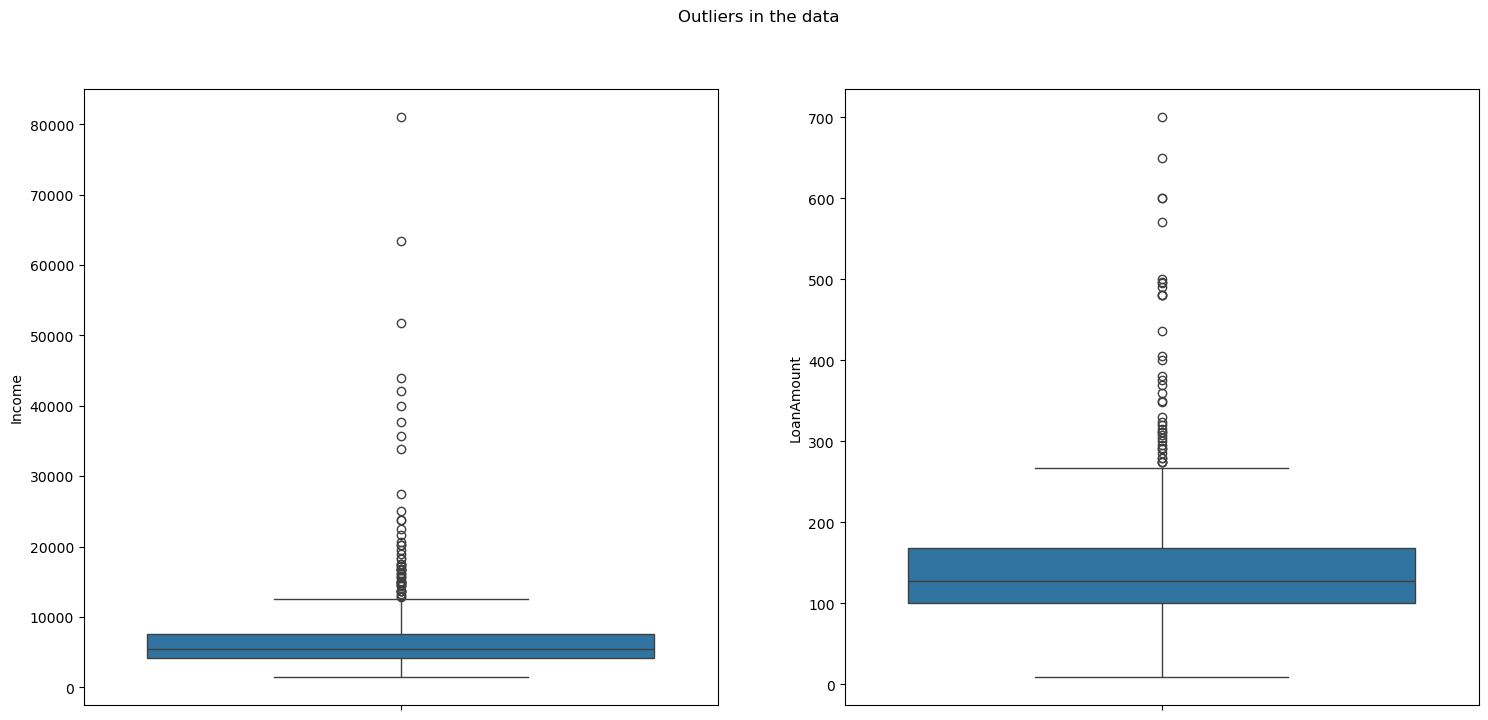

In [42]:
plt.subplot(1,2,1)
sns.boxplot(df['Income'])
plt.subplot(1,2,2)
sns.boxplot(df['LoanAmount'])
plt.suptitle('Outliers in the data')
plt.show()

**For Discrete Variables**

In [43]:
df[discrete_categorical].describe() # if any column has only one unique value then that column is removed

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,good,Semiurban,Y
freq,489,398,480,500,475,233,422


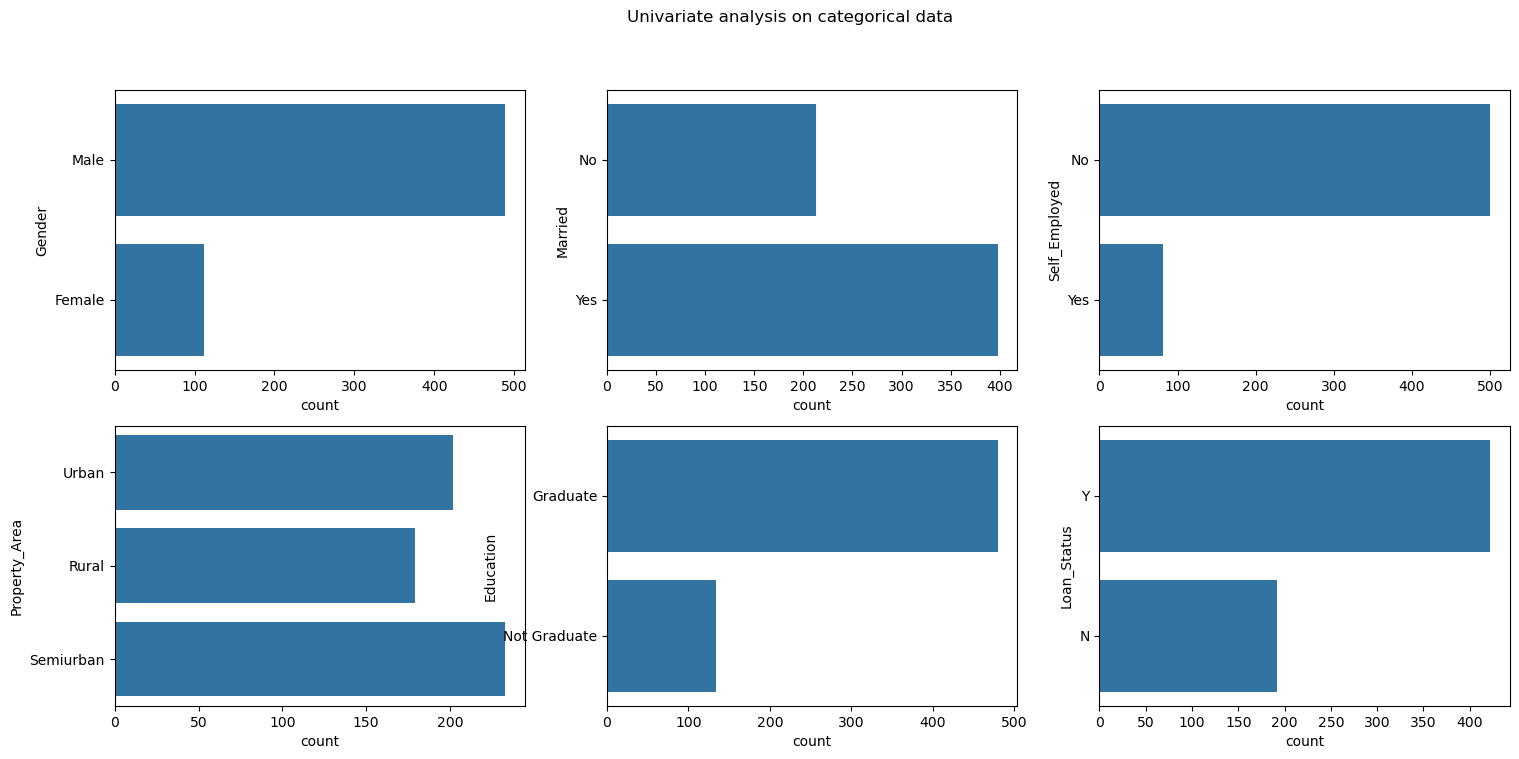

In [44]:
plt.rcParams['figure.figsize']=(18,8)

plt.subplot(2,3,1)
sns.countplot(df['Gender'])

plt.subplot(2,3,2)
sns.countplot(df['Married'])

plt.subplot(2,3,3)
sns.countplot(df['Self_Employed'])

plt.subplot(2,3,4)
sns.countplot(df['Property_Area'])

plt.subplot(2,3,5)
sns.countplot(df['Education'])

plt.subplot(2,3,6)
sns.countplot(df['Loan_Status'])

plt.suptitle('Univariate analysis on categorical data')
plt.show()

**check missing values**

In [45]:
df.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

# Data Preperation

1. Data Cleaning
   - wrong data
   - Missing Values
   - Wrong data type
   - duplicates
   - outliers
2. Data wrangling
   - transformation(applicable on continous)
   - scaling(applicable on continous)
   - encoding(applicable on discrete categorical)
   - **don't apply any data wrangling technique on count variable**

**wrong data treatement**

In [46]:
df['Dependents']=df['Dependents'].replace({'3+':3})

**Missing values treatment**

In [47]:
df['Dependents']=df['Dependents'].fillna(0)
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

df=df.dropna(subset=['Income','LoanAmount','Loan_Amount_Term','Credit_History'])

**Data type conversion**

In [48]:
df['Dependents']=df['Dependents'].astype('int')
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype('int')

**Outliers treatment**

In [49]:
# outliers are retained as some people will have high income really

**Transformations**

In [50]:
from scipy.stats import boxcox
df['Income'],a=boxcox(df['Income'])
df['LoanAmount'],c=boxcox(df['LoanAmount'])

In [51]:
df[continous].skew()

Income       -0.027769
LoanAmount    0.038289
dtype: float64

In [52]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,Male,Yes,1,Graduate,No,6.243267,360,good,Rural,N,1.864967
2,Male,Yes,0,Graduate,Yes,5.202610,360,good,Urban,Y,1.856556
3,Male,Yes,0,Not Graduate,No,6.138816,360,good,Urban,Y,1.862802
4,Male,No,0,Graduate,No,6.401083,360,good,Urban,Y,1.864819
5,Male,Yes,2,Graduate,Yes,7.481931,360,good,Urban,Y,1.868932
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,5.313992,360,good,Rural,Y,1.856068
610,Male,Yes,3,Graduate,No,4.460305,180,good,Rural,Y,1.860675
611,Male,Yes,1,Graduate,No,7.388071,360,good,Urban,Y,1.867771
612,Male,Yes,2,Graduate,No,6.870558,360,good,Urban,Y,1.866991


In [53]:
df['Gender']=df['Gender'].replace({'Male':1,'Female':0})
df['Married']=df['Married'].replace({'Yes':1,'No':0})
df['Education']=df['Education'].replace({'Graduate':1,'Not Graduate':0})
df['Self_Employed']=df['Self_Employed'].replace({'Yes':1,'No':0})
df['Property_Area']=df['Property_Area'].replace({'Rural':0,'Semiurban':1,'Urban':2})
df['Credit_History']=df['Credit_History'].replace({'good':1,'bad':0})
df['Loan_Status']=df['Loan_Status'].replace({'Y':1,'N':0})

In [54]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1,1,1,1,0,6.243267,360,1,0,0,1.864967
2,1,1,0,1,1,5.202610,360,1,2,1,1.856556
3,1,1,0,0,0,6.138816,360,1,2,1,1.862802
4,1,0,0,1,0,6.401083,360,1,2,1,1.864819
5,1,1,2,1,1,7.481931,360,1,2,1,1.868932
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,5.313992,360,1,0,1,1.856068
610,1,1,3,1,0,4.460305,180,1,0,1,1.860675
611,1,1,1,1,0,7.388071,360,1,2,1,1.867771
612,1,1,2,1,0,6.870558,360,1,2,1,1.866991


In [55]:
df.to_csv('cleaned loan data.csv')